In [2]:
import os
import csv
from sparta.Auxil.PeriodicityDetector import PeriodicityDetector
from sparta.UNICOR.Spectrum import Spectrum
from sparta.UNICOR.Template import Template
from sparta.Auxil.TimeSeries import TimeSeries
from sparta.Observations import Observations
import numpy as np
import pandas as pd
import sparta.Statistics as stat

In [42]:
# DATA PARAMETERS

survey = "CORALIE" # survey name
sample_rate = 1 # sample rate of the data
min_wv = 3900 # minimum wavelength of the data
max_wv = 6800 # maximum wavelength of the data
spec_dir = r"C:\Users\kentb\Desktop\PDM\data\Coralie14\spectra\RCru_Coralie14" # directory of the spectrum
rv_dir =  r"C:\Users\kentb\Desktop\PDM\data\RV\RCru_rv.csv"  # directory of the RVs
rassine_dir = r'C:\Users\kentb\Desktop\PDM\data\Rassine_spectra\RCru_output' # directory of the rassine spectra

# LOAD DATA
obs_data = Observations(survey=survey, sample_rate=sample_rate, min_wv=min_wv, max_wv=max_wv,
                        target_visits_lib=spec_dir)
df = pd.read_csv(rv_dir)
rv = df.rv.astype(float).values
e_rv = df.rv_err.astype(float).values
times = df.bjd.astype(float).values
unique_id = True
if survey == "CORALIE":
    try:
        ids = df.unique_id.astype(str).values
        ids = [id.replace(":","_") for id in ids]
    except AttributeError:
        print("No unique_id column in the RV file, using bjd instead")
        unique_id = False
        ids = None
        times = times - int(min(times))
        print(times)
        print(obs_data.time_series.times)
elif survey == "HERMES":
    ids = df.unique_id.astype(int).values

let's goooo
Using target_visits_lib: C:\Users\kentb\Desktop\PDM\data\Coralie14\spectra\RCru_Coralie14
Selected directory: C:\Users\kentb\Desktop\PDM\data\Coralie14\spectra\RCru_Coralie14


In [4]:
print(ids)
print(obs_data.unique_ids)


['CORALIE.2012-01-13T07_34_50.000', 'CORALIE.2012-01-15T07_44_41.000', 'CORALIE.2012-01-16T07_45_17.000', 'CORALIE.2012-01-18T08_21_49.000', 'CORALIE.2012-01-20T06_52_54.000', 'CORALIE.2012-01-23T08_33_54.000', 'CORALIE.2012-01-25T06_48_19.000', 'CORALIE.2012-03-19T05_01_30.000', 'CORALIE.2012-03-21T05_08_08.000', 'CORALIE.2012-03-22T03_05_48.000', 'CORALIE.2012-03-23T03_45_58.000', 'CORALIE.2012-03-25T06_56_28.000', 'CORALIE.2012-03-25T07_53_21.000', 'CORALIE.2012-05-05T01_17_56.000', 'CORALIE.2012-05-06T03_43_06.000', 'CORALIE.2012-05-07T01_09_54.000', 'CORALIE.2012-05-08T03_22_05.000', 'CORALIE.2012-05-09T04_11_54.000', 'CORALIE.2012-05-11T01_57_47.000', 'CORALIE.2012-05-12T00_02_40.000', 'CORALIE.2012-05-13T04_04_28.000', 'CORALIE.2012-05-14T04_09_15.000', 'CORALIE.2012-05-16T04_41_44.000', 'CORALIE.2012-05-17T04_46_30.000', 'CORALIE.2013-01-11T06_32_33.000', 'CORALIE.2013-01-12T07_41_56.000', 'CORALIE.2013-01-13T08_31_01.000', 'CORALIE.2013-01-14T07_35_30.000', 'CORALIE.2013-02-07

In [43]:
print(len(rv))
print(len(obs_data.time_series.times))
obs_data.rearrange_time_series(rv=rv, times=times,ids=ids,unique_id=unique_id)
print(len(obs_data.time_series.times))

218
97
Matching ratio -> 44 %
95


In [44]:
#replace in obs_data.time_series.vals the flux by the flux/continuum

for idx, file in enumerate(os.listdir(rassine_dir)):
    file_path = os.path.join(rassine_dir, file)
    #get rid of extension
    unique_id=file.split('.')[0]+'.'+file.split('.')[1]+'.'+file.split('.')[2]
    unique_id=unique_id.split('_')[1]+'_'+unique_id.split('_')[2]+'_'+unique_id.split('_')[3]
    rassine_spec = pd.read_pickle(file_path)
    flux = rassine_spec['flux']/rassine_spec['output']['continuum_linear']
    for idx2,_ in enumerate(obs_data.time_series.vals):
        if str(obs_data.unique_ids[idx2]) == unique_id:
            print(obs_data.unique_ids[idx2],unique_id," ok")
            obs_data.time_series.vals[idx2].sp[0] = flux


CORALIE.2015-01-24T06_40_21.000 CORALIE.2015-01-24T06_40_21.000  ok
CORALIE.2015-01-25T07_12_45.000 CORALIE.2015-01-25T07_12_45.000  ok
CORALIE.2015-01-26T07_13_14.000 CORALIE.2015-01-26T07_13_14.000  ok
CORALIE.2015-01-31T05_39_46.000 CORALIE.2015-01-31T05_39_46.000  ok
CORALIE.2015-02-01T04_51_24.000 CORALIE.2015-02-01T04_51_24.000  ok
CORALIE.2015-02-03T06_53_33.000 CORALIE.2015-02-03T06_53_33.000  ok
CORALIE.2015-02-06T04_53_15.000 CORALIE.2015-02-06T04_53_15.000  ok
CORALIE.2015-05-09T03_08_21.000 CORALIE.2015-05-09T03_08_21.000  ok
CORALIE.2015-05-10T02_56_46.000 CORALIE.2015-05-10T02_56_46.000  ok
CORALIE.2015-05-12T02_52_05.000 CORALIE.2015-05-12T02_52_05.000  ok
CORALIE.2015-05-13T03_12_48.000 CORALIE.2015-05-13T03_12_48.000  ok
CORALIE.2015-05-14T02_54_04.000 CORALIE.2015-05-14T02_54_04.000  ok
CORALIE.2015-05-15T02_42_08.000 CORALIE.2015-05-15T02_42_08.000  ok
CORALIE.2015-05-16T03_11_33.000 CORALIE.2015-05-16T03_11_33.000  ok
CORALIE.2015-05-17T02_52_49.000 CORALIE.2015-05-

In [45]:
obs_data.clean_time_series(nan_flag=False, min_wv=4855, max_wv=4865, size_flag=True)

Cleaning time series...


In [65]:
# PERIODOGRAM PARAMETERS

baseline = np.max(obs_data.time_series.times) - np.min(obs_data.time_series.times) # baseline of the data
min_freq = 2/baseline # Or maybe 1/2/baseline to be sure but let's test it that way.
max_freq = 2 # depends on the star.
freq_range = (min_freq, max_freq) # frequency range of the periodograms
points_per_peak = 5
periodogram_grid_resolution = points_per_peak*max_freq*baseline # frequency resolution of the periodograms
print('periodogram_grid_resolution ',periodogram_grid_resolution)

# RESULS DIRECTORY

results_dir = r'C:\Users\kentb\Desktop\PDM\thesis\main\extracting_rvs' # directory of the results

periodogram_grid_resolution  25350.704750000004


In [66]:
## Compute periodograms

# Choosing frequency range and frequency resolution for the periodograms.
obs_data.initialize_periodicity_detector(freq_range=freq_range,periodogram_grid_resolution=periodogram_grid_resolution)

obs_data.periodicity_detector.calc_GLS()

print("GLS done",flush=True)

obs_data.periodicity_detector.calc_PDC(calc_biased_flag=False, calc_unbiased_flag=True)

print("PDC done",flush=True)

obs_data.periodicity_detector.calc_USURPER(calc_biased_flag=False, calc_unbiased_flag=True)

print("USURPER done",flush=True)

obs_data.periodicity_detector.calc_partial_periodogram(partial_type="shape")

print("Shape done",flush=True)

obs_data.periodicity_detector.calc_partial_periodogram(partial_type="shift")

print("Shift done",flush=True)

GLS done
PDC done
USURPER done
Shape done
Shift done


In [67]:
# Save the observations instance in a pickle file with the name of the spec_dir name in the results directory

with open(os.path.join(results_dir, f"{spec_dir.rsplit('/',maxsplit=1)[-1]}_{str(min_wv)}_{str(max_wv)}_hbeta_extracted.csv"), 'w',newline='',encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(["freq", "gls","usurper","pdc_unbiased","shape_periodogram", "shift_periodogram"])
    for i in range(len(obs_data.periodicity_detector.results_frequency['GLS'])):
        writer.writerow([obs_data.periodicity_detector.results_frequency['GLS'][i],
                        obs_data.periodicity_detector.results_power['GLS'][i],
                        obs_data.periodicity_detector.results_power['USURPER'][i],
                        obs_data.periodicity_detector.results_power['PDC_unbiased'][i],
                        obs_data.periodicity_detector.results_power['shape_periodogram'][i],
                        obs_data.periodicity_detector.results_power['shift_periodogram'][i]])
with open(os.path.join(results_dir, f"{spec_dir.rsplit('/',maxsplit=1)[-1]}_times.csv"), 'w',newline='',encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(["times"])
    for i in obs_data.time_series.times:
        writer.writerow([i])

print("Done")

Done


In [51]:
# Retrieve the template.
# If the template is not located in a local directory 
# it will be downloaded from the PHOENIX FTP:
template = Template(temp=5800, 
                    log_g=3.5, 
                    metal=0.5, 
                    alpha=0.0, 
                    min_val=4855, 
                    max_val=4865,
                    air=True)

# Bin the template, to reduce computational strain:
print('Integrating.', end=' ')
template.integrate_spec(integration_ratio=3)

# Make sure that the data are evenly sampled.
# No over sampling required, so the delta=1 (because when delta<1 sp is oversampled)
print('Interpolating.', end=' ')
template.model.InterpolateSpectrum(delta=1)

# Apply rotational broadening of 6 km/s:
print('Rotating.', end=' ')
template.RotationalBroadening(vsini=6, epsilon=0.5)

# Instrumental broadening for R=53,000
print('Broadening.', end=' ')
template.GaussianBroadening(resolution=60000)

# Cut the template like the observed spectrum
print('Cutting to fit spectra.', end=' ')
template.cut_multiorder_like(obs_data.spec_list[0], margins=150)

print('Done.')

Integrating. Interpolating. Rotating. Broadening. Cutting to fit spectra. Done.


In [52]:
# Filter the spectrum Just like the observations were filtered:
wave, flux = template.model.wv[0], template.model.sp[0]
# save in a csv file
with open(os.path.join(results_dir, f"{spec_dir.rsplit('/',maxsplit=1)[-1]}_template_hbeta.csv"), 'w',newline='',encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(["wave", "flux"])
    for i in range(len(wave)):
        writer.writerow([wave[i],flux[i]])

In [62]:
template_path = r'C:\Users\kentb\Desktop\PDM\thesis\main\extracting_rvs\RASSINE_RCru_Coralie14_template.p'
rassine_spec = pd.read_pickle(template_path)
flux = rassine_spec['flux']/rassine_spec['output']['continuum_linear']
wave = rassine_spec['wave']
# restrain flux and wave to 4855-4865
flux = flux[(wave>=4855) & (wave<=4865)]
wave = wave[(wave>=4855) & (wave<=4865)]
for idx2,_ in enumerate(template.model.sp):
    template.model.sp[0] = flux
    template.model.wv[0] = wave

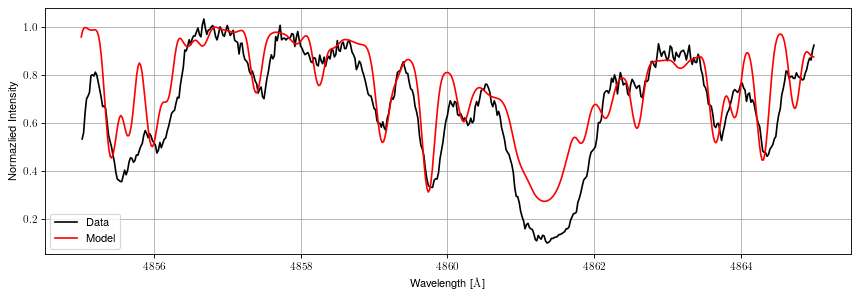

In [63]:
import matplotlib.pyplot as plt
# plot order 0
plt.figure(figsize=(13, 4), dpi= 80, facecolor='w', edgecolor='k')
ax1 = plt.plot(obs_data.spec_list[0].wv[0], obs_data.spec_list[0].sp[0], 'k', label='Data')
ax2 = plt.plot(template.model.wv[0], template.model.sp[0], 'r', label='Model')

plt.xlabel(r'Wavelength [${\rm \AA}$]')
plt.ylabel(r'Normazlied Intensity')
plt.legend()
plt.grid()

In [64]:
# Set the correlation velocity resolution and bounds.
# ---------------------------------------------------
dv = 0.5          # Assumed to be in km/s unless provided as an Astropy Unit.

# Set the velocity range for analysis:
# -----------------------------------
VelBound = [-100, 50] # Boundaries for the cross correlation.

obs_data.calc_rv_against_template(template, dv=dv, VelBound=VelBound, err_per_ord=False, combine_ccfs=True, fastccf=True)
obs_data.time_series.calculated_vrad_list = obs_data.vels

 27%|██▋       | 26/95 [00:00<00:00, 256.15it/s]c:\users\kentb\desktop\pdm\sparta\sparta\UNICOR\CCF1d.py:262: RuntimeWarning: invalid value encountered in sqrt
  eRV = np.sqrt(-(ml_factor*Nord*Nvels)**(-1))
100%|██████████| 95/95 [00:00<00:00, 282.50it/s]


In [29]:
from sparta.Statistics import open_csv
plt.style.use('sparta')
from matplotlib.ticker import MaxNLocator

In [68]:
extracted_path = r'C:\Users\kentb\Desktop\PDM\thesis\main\extracting_rvs\RCru_Coralie14_3900_6800_hbeta_extracted.csv'
regular_path = r'C:\Users\kentb\Desktop\PDM\thesis\main\extracting_rvs\RCru_Coralie14_3900_6800_hbeta.csv'

extracted = open_csv(extracted_path)
regular = open_csv(regular_path)

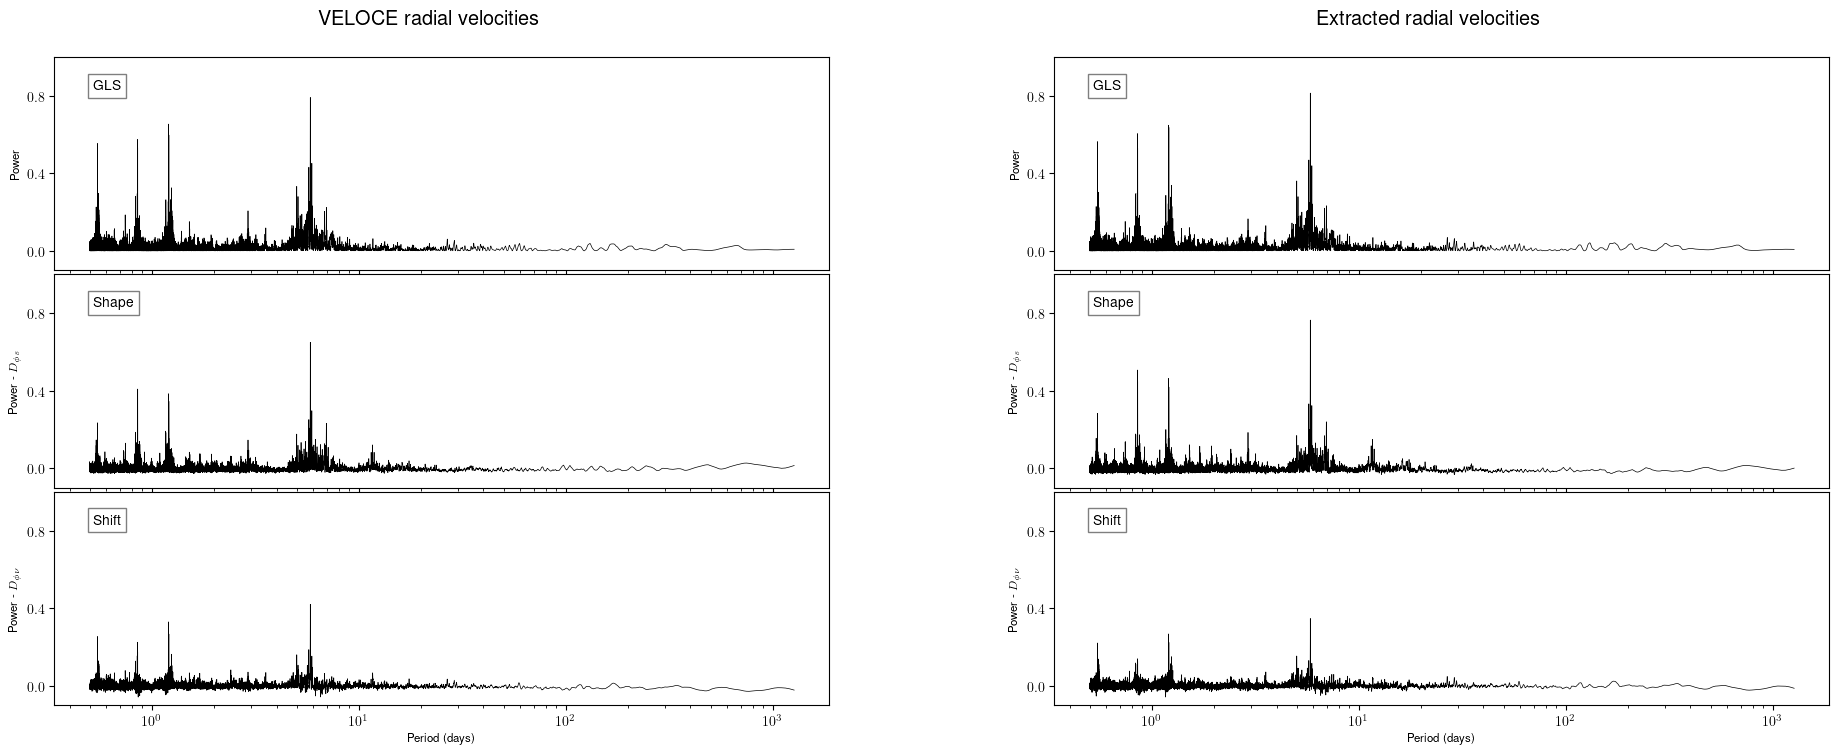

In [70]:
fig = plt.figure(constrained_layout=False, figsize=(20, 8))
fig.suptitle(r'Extracted vs Regular', fontsize='x-large')

subfigs = fig.subfigures(1, 2)

for outerind, subfig in enumerate(subfigs.flat):
    if outerind==0:
        results = regular
        subfig.suptitle(r'VELOCE radial velocities', fontsize='x-large')
    else:
        results = extracted
        subfig.suptitle(r'Extracted radial velocities', fontsize='x-large')
    axs = subfig.subplots(3, 1,sharex=True)
    for innerind, ax in enumerate(axs.flat):
        if innerind==0:
            ax.plot(results['period'],results['gls'],linewidth=0.5)
            ax.set_ylabel('Power', fontsize='small')
        elif innerind==1:
            ax.plot(results['period'],results['shape'],linewidth=0.5)
            #plot horitzontal line at 0.8
            # ax.plot(results['period'],np.ones(len(results['period']))*0.8,linewidth=0.5)
            ax.set_ylabel(r'Power - $D_{\phi s}$', fontsize='small')
        elif innerind==2:
            ax.plot(results['period'],results['shift'],linewidth=0.5)
            #plot moving average
            ax.set_ylabel(r'Power - $D_{\phi \nu}$', fontsize='small')
            ax.set_xlabel('Period (days)', fontsize='small')
        # Add a small text box
        text_box = f"{['GLS', 'Shape', 'Shift'][innerind]}"
        ax.text(0.05, 0.85, text_box, transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.5))
        ax.set_ylim(-0.1,1)
        # ax.set_xlim(0,1000)
        ax.set_xscale('log')
        ax.yaxis.set_major_locator(MaxNLocator(nbins=3))
plt.subplots_adjust(top=0.92, hspace=0.02, wspace=0.2)
plt.savefig('RCru_veloceVSextracted_hbeta.png', dpi=300)
plt.show()